Wynik dla:  kino
50.0 % pewnosci wyboru
Wynik dla:  teatr
24.0 % pewnosci wyboru
Wynik dla:  restauracja
17.0 % pewnosci wyboru
Wynik dla:  sport na powietrzu
51.0 % pewnosci wyboru
Wynik dla: sport w klubie
50.0 % pewnosci wyboru
Wynik dla:  basen
50.0 % pewnosci wyboru
Wynik dla:  czytanie
59.0 % pewnosci wyboru
Wynik dla:  film w domu
59.0 % pewnosci wyboru
---------- Wtorek, luty ----------
Wynik dla:  kino
50.0 % pewnosci wyboru
Wynik dla:  teatr
24.0 % pewnosci wyboru
Wynik dla: restauracja
17.0 % pewnosci wyboru
Wynik dla:  sport na powietrzu
50.0 % pewnosci wyboru
Wynik dla:  sport w klubie
50.0 % pewnosci wyboru
Wynik dla:  basen
50.0 % pewnosci wyboru
Wynik dla:  czytanie
50.0 % pewnosci wyboru
Wynik dla:  film w domu
50.0 % pewnosci wyboru


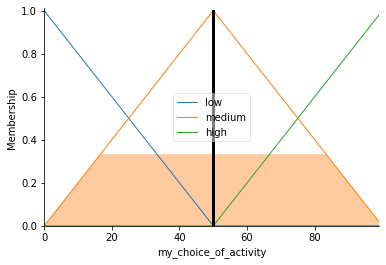

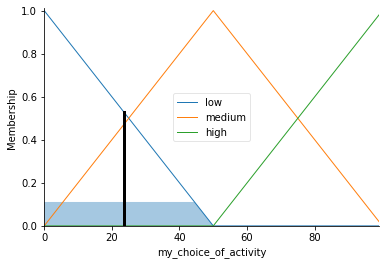

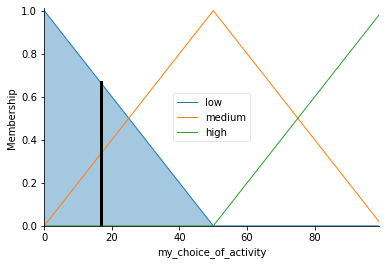

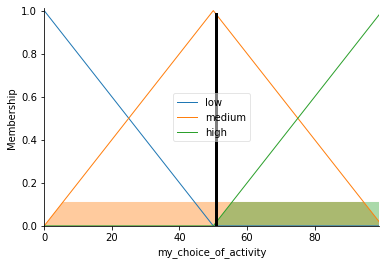

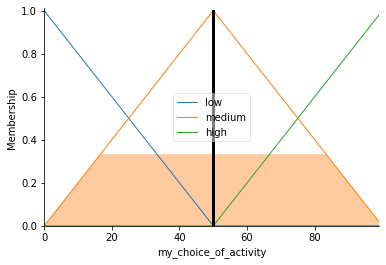

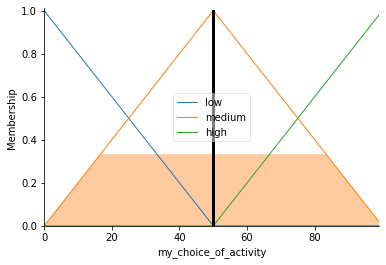

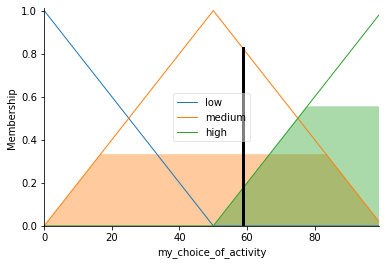

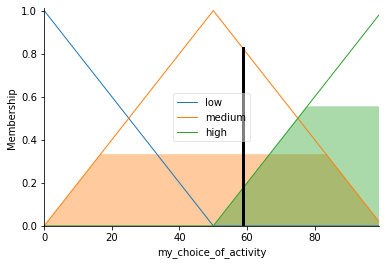

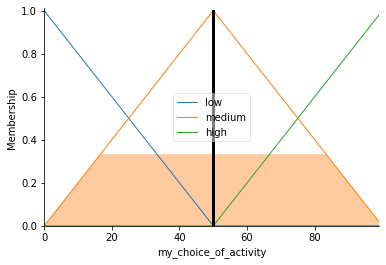

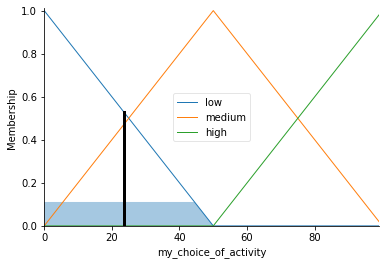

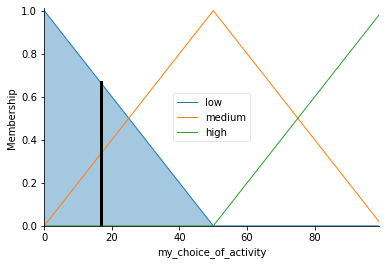

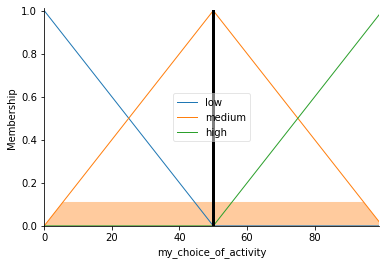

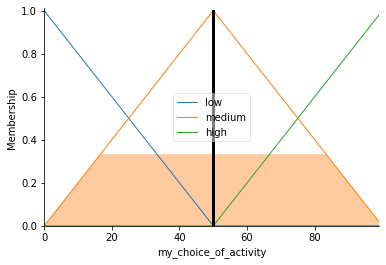

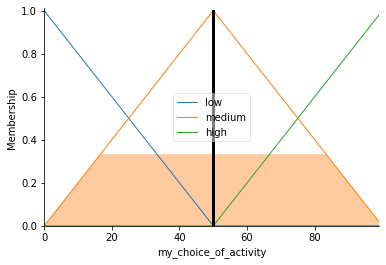

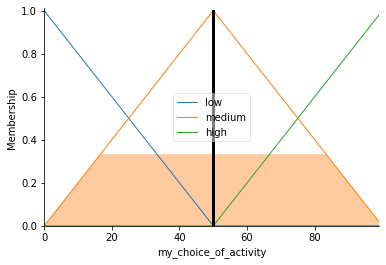

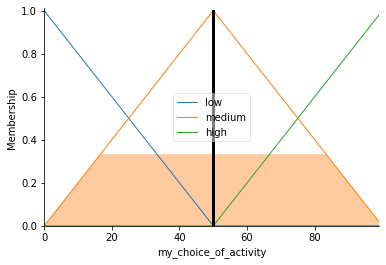

In [25]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

free_time = ctrl.Antecedent(np.arange(0, 1, 0.1), 'free_time')
cost = ctrl.Antecedent(np.arange(0, 1, 0.1), 'cost')
activity_level = ctrl.Antecedent(np.arange(0, 1, 0.1), 'activity_level')
my_choice_of_activity = ctrl.Consequent(np.arange(0, 100, 1), 'my_choice_of_activity')

free_time.automf(5)
cost.automf(5)
activity_level.automf(5)

my_choice_of_activity['low'] = fuzz.trimf(my_choice_of_activity.universe, [0, 0,50])
my_choice_of_activity['medium'] = fuzz.trimf(my_choice_of_activity.universe, [0, 50,100])
my_choice_of_activity['high'] = fuzz.trimf(my_choice_of_activity.universe, [50, 100, 100])


rule1 = ctrl.Rule(cost['poor'] & (free_time['good'] | activity_level['good']), my_choice_of_activity['high'])
rule2 = ctrl.Rule(cost['average'] & free_time['average']  , my_choice_of_activity['medium'])
rule3 = ctrl.Rule(cost['good'] | free_time['poor'], my_choice_of_activity['low'])
rule4 = ctrl.Rule(cost['poor'] & (free_time['average'] | activity_level['average']), my_choice_of_activity['medium'])

my_choice_of_activity_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4])

choice = ctrl.ControlSystemSimulation(my_choice_of_activity_ctrl)

czas_wolny={"poniedziałek": 0.6, "wtorek": 0.6, "środa": 0.5, "czwartek": 0.5, "piątek": 0.7}
koszty={"kino": 0.6, "teatr": 0.7, "restauracja": 0.9, "sport na powietrzu": 0.2, "sport w klubie": 0.6, "basen": 0.3, "czytanie": 0.1,"film w domu":0.1}
aktywnosc={"styczeń": 0.2, "luty": 0.1, "marzec": 0.5, "kwiecień": 0.5, "maj": 0.7, "czerwiec": 0.8, "lipiec": 0.9,"sierpień":0.9,"wrzesień":0.8,"pażdziernik":0.5,"listopad":0.3,"grudzień":0.2}



def decyzja(dzien_tygodnia,miesiac): 
    for x in zip(koszty.values(),koszty.keys()):
        choice.input['free_time']=czas_wolny.get(dzien_tygodnia)
        choice.input['cost']=x[0]
        choice.input['activity_level']=aktywnosc.get(miesiac)
        choice.compute()
        print("Wynik dla: ",x[1])
        print(np.round(choice.output['my_choice_of_activity']),"% pewnosci wyboru")
        
        my_choice_of_activity.view(sim=choice)
    
dzien_tygodnia="poniedziałek"
miesiac="sierpień"

decyzja(dzien_tygodnia,miesiac)

print("-"*10,"Wtorek, luty","-"*10)
dzien_tygodnia="wtorek"
miesiac="luty"

decyzja(dzien_tygodnia,miesiac)
